
## Tour Data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score


데이터 변수 설명

nation - 신용카드 이용자의 국적 (전체 20개국)

sido - 카드 가맹점 주소(시도)

gu - 카드 가맹점 주소 (시군구)

GB3 / GB2 -> 가맹점 업종 대분류/소분류

TA_YM -> 이용년월 

DAW_CCD_R -요일 (WHITE 평일 RED주말)

APV_TS_DL_TM_R - 이용시간대 (활동 07~ 19시 휴식 19~02 취침 02~07)

VLM 취급액

USEC 이용건수

In [29]:
# GB2 데이터 값이뒤에 구분자 tab이 아니라 붙어있어서 데이터가 잘못 들어간거 확인
# 파일을 새로 써서 preprocessing_data로 변환하여 pandas로 데이터 열람 가능하게 변경

file = open("C:/Data_analysis/2019bigdata/tour_gogo/preprocessing_data03.txt",'a',encoding = 'utf-8')
f = open("data_out_1.txt", 'r', encoding = 'utf-8')
while True:
    line = f.readline()
    tab = line.replace("?", '\t')
    file.write(tab)
    if not line: break
f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'data_out_1.txt'

In [2]:
# 원본은 3668890개 ? -> tab으로 수정한 파일은 3668818 
# 차이가 총 72개 왜 72건은 안써지는지 모르겠으나 preprocessing_data04 여기에다가 밑에 안붙은 72건 채워서 완료.

In [3]:
df = pd.read_table("preprocessing_data04.txt")
print(df.shape)
df.head()

(3668890, 10)


,nation,sido,gu,GB3,GB2,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC
0,미국,세종,세종,의료,개인병원,201801,WHITE,활동,2071580,20
1,홍콩,세종,세종,교통,교통,201804,RED,활동,8100,1
2,미국,세종,세종,의료,개인병원,201806,RED,활동,60400,2
3,일본,세종,세종,교통,교통,201806,WHITE,활동,235000,4
4,미국,세종,세종,교통,교통,201810,WHITE,활동,853740,14


In [4]:
# 결측치 확인 

df.isnull().sum()

nation            0
sido              0
gu                0
GB3               0
GB2               0
TA_YM             0
DAW_CCD_R         0
APV_TS_DL_TM_R    0
VLM               0
USEC              0
dtype: int64

In [5]:
# 데이터 타입 변경

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668890 entries, 0 to 3668889
Data columns (total 10 columns):
nation            object
sido              object
gu                object
GB3               object
GB2               object
TA_YM             int64
DAW_CCD_R         object
APV_TS_DL_TM_R    object
VLM               int64
USEC              int64
dtypes: int64(3), object(7)
memory usage: 279.9+ MB


In [6]:
# 데이터 타입 변경

df['VLM'] = df['VLM'].astype('int64')
df['USEC'] = df['USEC'].astype('int64')
df['TA_YM'] = pd.to_datetime(df['TA_YM'], format = '%Y%m')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668890 entries, 0 to 3668889
Data columns (total 10 columns):
nation            object
sido              object
gu                object
GB3               object
GB2               object
TA_YM             datetime64[ns]
DAW_CCD_R         object
APV_TS_DL_TM_R    object
VLM               int64
USEC              int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 279.9+ MB


In [8]:
# 이산형 변수로 정리 1주말 0평일 
# 0활동 1휴식 2취침

df['DAW_CCD_R'] = df['DAW_CCD_R'].replace({'WHITE':'0','RED':'1'})
df['APV_TS_DL_TM_R'] = df['APV_TS_DL_TM_R'].replace({'활동':'0','휴식':'1','취침':'2'})

In [9]:
df.head()

,nation,sido,gu,GB3,GB2,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC
0,미국,세종,세종,의료,개인병원,2018-01-01,0,0,2071580,20
1,홍콩,세종,세종,교통,교통,2018-04-01,1,0,8100,1
2,미국,세종,세종,의료,개인병원,2018-06-01,1,0,60400,2
3,일본,세종,세종,교통,교통,2018-06-01,0,0,235000,4
4,미국,세종,세종,교통,교통,2018-10-01,0,0,853740,14


In [10]:
df.tail()

,nation,sido,gu,GB3,GB2,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC
3668885,아랍에미레이트,부산,해운대구,숙박,그외숙박,2018-11-01,1,1,61600,1
3668886,태국,부산,해운대구,의료,치과병원,2018-09-01,0,0,150000,1
3668887,캐나다,부산,해운대구,의료,"한의원,한약방",2018-05-01,0,0,420000,1
3668888,캐나다,부산,해운대구,숙박,그외숙박,2018-09-01,1,2,136400,1
3668889,홍콩,부산,해운대구,숙박,그외숙박,2018-08-01,0,2,114840,1


In [11]:
# 데이터별 범주 갯수

print("전체:",df['nation'].nunique(),'개국')
print("전체:",df['sido'].nunique(),'개 시도')
print("전체:",df['gu'].nunique(),'개 구')
print("전체:",df['GB3'].nunique(),'개 대분류')
print("전체:",df['GB2'].nunique(),'개 소분류')

전체: 20 개국
전체: 17 개 시도
전체: 214 개 구
전체: 7 개 대분류
전체: 51 개 소분류


## EDA

In [12]:
# 외국인 평균 53건 사용, 약 7백만원

df.describe()

,VLM,USEC
count,3.668890e+06,3.668890e+06
mean,7.074714e+06,5.376232e+01
std,1.607373e+08,5.796205e+02
min,0.000000e+00,1.000000e+00
25%,3.900000e+04,1.000000e+00
50%,1.628700e+05,3.000000e+00
75%,8.620338e+05,1.200000e+01
max,4.765281e+10,9.933100e+04


In [13]:
print(df['VLM'].max())
df.describe().astype('int64')

47652806193


,VLM,USEC
count,3668890,3668890
mean,7074713,53
std,160737251,579
min,0,1
25%,39000,1
50%,162870,3
75%,862033,12
max,47652806193,99331


In [14]:
# 쇼핑할때 가장 돈을 많이 씀 적으로
# 이용 건수 또한 쇼핑이 압도적으로 많다.

gr_money = df.groupby('GB3')[['VLM','USEC']].sum()
gr_money['결제한건 금액'] = round(gr_money['VLM']/gr_money['USEC'])
gr_money

# 음식 한끼당사만원
# 의료 한번에 사십만원??
# 쇼핑 회당 십삼만원
# 교통비가 회당 십사만원????

,VLM,USEC,결제한건 금액
GB3,,,
교통,1003162758040,6797143,147586.0
쇼핑,14774689104262,113972589,129634.0
숙박,6234123913422,16347949,381340.0
스포츠,115444691379,1167090,98917.0
음식,2340891670565,53453148,43793.0
의료,1302546363355,3139825,414847.0
체험,185487197680,2370289,78255.0


In [15]:
# 시간대별 카드 사용 
gr_time = df.groupby('APV_TS_DL_TM_R')[['VLM','USEC']].sum()
gr_time['VLM/USEC'] = round(gr_time['VLM']/gr_time['USEC'])
gr_time

,VLM,USEC,VLM/USEC
APV_TS_DL_TM_R,,,
0,18548244092242,131713447,140823.0
1,6384477884001,59293931,107675.0
2,1023623722460,6240655,164025.0


In [16]:
#index를 time준 dataframe 

df_time = df.sort_values('TA_YM').reset_index()
df_time.drop('index', axis = 1, inplace=True)
df_time = df_time.set_index('TA_YM')
df_time.head()

,nation,sido,gu,GB3,GB2,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC
TA_YM,,,,,,,,,
2016-01-01,홍콩,부산,해운대구,쇼핑,의류잡화,1,0,308500,2
2016-01-01,오스트레일리아,서울,종로구,의료,"의료기기,건강진단",0,0,268000,2
2016-01-01,캐나다,경기,의정부시,쇼핑,백화점,0,0,637300,8
2016-01-01,캐나다,서울,마포구,숙박,특급호텔,0,2,254200,2
2016-01-01,베트남,서울,구로구,교통,교통,1,0,503785,4


In [17]:
df.head()

,nation,sido,gu,GB3,GB2,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC
0,미국,세종,세종,의료,개인병원,2018-01-01,0,0,2071580,20
1,홍콩,세종,세종,교통,교통,2018-04-01,1,0,8100,1
2,미국,세종,세종,의료,개인병원,2018-06-01,1,0,60400,2
3,일본,세종,세종,교통,교통,2018-06-01,0,0,235000,4
4,미국,세종,세종,교통,교통,2018-10-01,0,0,853740,14


In [18]:
# 총 구별 개수는 215개구
# 각 구별 카드사용량 상위(3), 하위(3)
# 각 구별 어떤 특징인가?

gu_card = df.groupby(['gu','GB2'],as_index=False)[['VLM','USEC']].sum().sort_values(['gu','USEC'], ascending=False)

gu = df['gu'].unique()

for i in gu:
    head = gu_card[gu_card['gu'] == i].head(3)
    tail = gu_card[gu_card['gu'] == i].tail(3)
    
    print(head)
    print(tail)
    print('\n')


# ee = ss.sort_values(['gu','USEC'], ascending = False)


      gu      GB2         VLM   USEC
3526  세종  할인점/편의점  1680232733  62411
3523  세종       한식   553417871  20551
3524  세종      한식외   477536827  19507
      gu        GB2     VLM  USEC
3507  세종    수련원,체험장  525000     4
3508  세종        수영장  330000     3
3516  세종  의료기기,건강진단  109500     3


      gu      GB2          VLM    USEC
1630  남구  할인점/편의점  11277915122  425745
1628  남구      한식외   6468962150  272910
1627  남구       한식   6769423906  173016
      gu     GB2      VLM  USEC
1613  남구  운동경기관람   242500     3
1596  남구    동물농장    93000     2
1607  남구    수중장비  1070000     2


      gu      GB2          VLM    USEC
2153  동구  할인점/편의점  23413934627  484973
2151  동구      한식외   5736212557  214242
2150  동구       한식   5715721238  166104
      gu   GB2     VLM  USEC
2130  동구   수영장  141500     9
2119  동구  동물농장  155000     6
2147  동구  테니스장  119500     3


      gu      GB2         VLM    USEC
2899  북구  할인점/편의점  6893723554  259961
2897  북구      한식외  2146925047   99793
2896  북구       한식  2690055373   70584
  

1670  남동구       한식  1826294926   31185
       gu         GB2     VLM  USEC
1664  남동구  종합레저타운/놀이동  208400     8
1651  남동구     수련원,체험장   57000     3
1653  남동구         수족관    6000     1


       gu      GB2        VLM  USEC
1748  남원시  할인점/편의점  274759661  4769
1746  남원시      한식외   59778971  2549
1745  남원시       한식  127424872  1707
       gu        GB2     VLM  USEC
1738  남원시  의료기기,건강진단  115000     3
1744  남원시       피부미용  229000     3
1732  남원시      실내골프장   75000     2


       gu      GB2         VLM  USEC
1784  남해군  할인점/편의점    75336971  3010
1781  남해군       한식   161909013  2423
1771  남해군    실외골프장  1366366220  2332
       gu    GB2    VLM  USEC
1770  남해군  실내골프장  45000     3
1766  남해군    당구장  21000     2
1768  남해군    볼링장  40000     2


       gu      GB2         VLM    USEC
1824  노원구  할인점/편의점  4615179061  137693
1822  노원구      한식외  1358237724   53776
1821  노원구       한식  1777969824   46610
       gu    GB2      VLM  USEC
1791  노원구  관광여행사  3094600     4
1800  노원구    보건소    43060     4
1805  노


       gu      GB2       VLM  USEC
4505  영광군  할인점/편의점  96632052  2465
4495  영광군     음료제과  16922287   823
4502  영광군       한식  66491411   819
       gu       GB2     VLM  USEC
4500  영광군      치과병원   57060     2
4493  영광군      오락시설   20000     1
4498  영광군  자전거(성인용)  170000     1


       gu      GB2        VLM  USEC
4531  영덕군  할인점/편의점   42357454  2247
4529  영덕군      한식외   31603300  1198
4528  영덕군       한식  226715376  1175
       gu        GB2      VLM  USEC
4516  영덕군    수련원,체험장  2098792     3
4510  영덕군       관광상품    77000     2
4522  영덕군  의료기기,건강진단    57000     2


       gu      GB2          VLM   USEC
4568  영도구  할인점/편의점    445901817  31656
4537  영도구     관광상품  16401300543  15858
4565  영도구       한식    573936460   6976
       gu  GB2    VLM  USEC
4542  영도구  당구장  11000     1
4544  영도구  면세점  11700     1
4546  영도구  보건소   5530     1


       gu      GB2       VLM  USEC
4599  영동군  할인점/편의점  78850524  2906
4596  영동군       한식  52730973  1206
4597  영동군      한식외  43063864  1186
       gu       GB2  

       gu      GB2       VLM  USEC
5594  장성군       한식  35851283  1276
5597  장성군  할인점/편의점  32656338   938
5577  장성군       교통  38916267   629
       gu         GB2     VLM  USEC
5583  장성군  스포츠센타/레포츠클  130000     1
5586  장성군        오락시설   25000     1
5592  장성군  종합레저타운/놀이동    5000     1


       gu      GB2         VLM   USEC
5959  중랑구  할인점/편의점  2749754217  55290
5956  중랑구       한식  1334468946  22742
5957  중랑구      한식외   488646618  15710
       gu   GB2     VLM  USEC
5954  중랑구  테니스장  210600    10
5937  중랑구   보건소   20741     4
5941  중랑구   수족관   33000     1


       gu      GB2       VLM  USEC
5985  증평군  할인점/편의점  58901325  2817
5983  증평군      한식외  55642801  1302
5982  증평군       한식  43035939   897
       gu        GB2      VLM  USEC
5979  증평군   자전거(성인용)   230000     3
5981  증평군       피부미용   626396     3
5976  증평군  의료기기,건강진단  2030000     2


       gu      GB2         VLM  USEC
6009  진도군  할인점/편의점   170059902  5137
5994  진도군     기타쇼핑  2685030958  1395
6006  진도군       한식    53554266   741
      

        gu      GB2           VLM    USEC
3193  서귀포시  할인점/편의점   17860485744  459233
3161  서귀포시     그외숙박  151895824272  310748
3191  서귀포시      한식외   20476570994  306198
        gu        GB2      VLM  USEC
3164  서귀포시        당구장   533389    12
3171  서귀포시        수영장  2908076     6
3181  서귀포시  의료기기,건강진단  3935998     6


        gu      GB2          VLM     USEC
3234  서대문구  할인점/편의점  32818464105  1111577
3232  서대문구      한식외  14630056414   839554
3231  서대문구       한식  12212322003   410658
        gu    GB2       VLM  USEC
3211  서대문구  산후조리원  11259419     9
3215  서대문구    스키장    275000     4
3209  서대문구   보트판매     50000     2


        gu      GB2           VLM    USEC
4609  영등포구     기타쇼핑    8006882602  553004
4643  영등포구  할인점/편의점   21124760102  536375
4638  영등포구     특급호텔  218970385548  410523
        gu   GB2      VLM  USEC
4618  영등포구  보트판매  2077921    10
4612  영등포구  동물농장   113420     5
4637  영등포구  테니스장   257600     5


        gu      GB2         VLM    USEC
5440  의정부시      한식외  2929335854  15482

In [19]:
# 구, 금액
# 위와 매우 동일 

rr = df.groupby(['sido','gu','GB3','GB2'])[['VLM','USEC']].sum()
rr.sort_values('VLM', ascending=False)

# rr.to_csv('tt.csv')

VLM     USEC
sido gu   GB3 GB2                               
서울   중구   쇼핑  면세점         1616617170966  4883331
          숙박  특급호텔        1615383864235  3954051
          쇼핑  백화점         1462465461449  5627718
     구로구  쇼핑  기타지출        1122991222160  2615135
인천   중구   쇼핑  면세점         1080145175679  5574527
서울   중구   쇼핑  의류잡화         631777932243  4919402
     강남구  숙박  특급호텔         595076310276  1057901
          쇼핑  의류잡화         447707096420  2074633
     중구   쇼핑  기타지출         433832562628  3208596
     강남구  의료  개인병원         417210565011   264231
     강서구  교통  교통           383754249506  1464705
     강남구  쇼핑  기타지출         338899385469  2860908
     중구   쇼핑  화장품          296416844143  3402616
제주   제주시  쇼핑  면세점          289273620022  1082379
서울   양천구  쇼핑  기타지출         263052579463   402942
     중구   쇼핑  할인점/편의점      258066884832  4836632
          교통  교통           256692296090  2012863
인천   중구   숙박  특급호텔         256383914602   447577
서울   송파구  쇼핑  백화점          249032471812  1025051
     중구   숙박  그외숙박         240941680779   833695
              1급2급호텔       232674634258   727759
     영등포구 숙박  특급호텔         218970385548   410523
     종로구  숙박  특급호텔         207590901133   268660
     마포구  쇼핑  관광상품         204067925893   296615
     강남구  쇼핑  백화점          203138790403   577017
     마포구  쇼핑  화장품          199772818026   897260
     서초구  숙박  특급호텔         195967214647   299388
     종로구  쇼핑  면세점          191533788500  1052011
     중구   음식  한식           187661199289  2429412
     용산구  숙박  특급호텔         169533347669   262811
...                                 ...      ...
충남   청양군  체험  목욕시설                 6000        1
충북   옥천군  체험  공연장,극장               6000        1
전남   고흥군  스포츠 종합레저타운/놀이동           6000        1
경기   동두천시 의료  보건소                  5990        2
부산   영도구  의료  보건소                  5530        1
강원   횡성군  체험  공연장,극장               5500        1
경북   상주시  의료  보건소                  5250        1
     칠곡군  의료  보건소                  5030        1
충남   청양군  체험  공연장,극장               5000        1
광주   동구   체험  수족관                  5000        1
전북   장수군  체험  공연장,극장               5000        1
강원   영월군  의료  보건소                  5000        1
전남   장성군  스포츠 종합레저타운/놀이동           5000        1
     광양시  의료  보건소                  4750        1
강원   홍천군  의료  보건소                  4750        1
경남   밀양시  의료  보건소                  4750        1
전남   장성군  체험  공연장,극장               4500        1
경북   군위군  체험  수련원,체험장              4000        1
대전   대덕구  의료  보건소                  3500        1
대구   서구   의료  보건소                  3500        1
경북   경산시  체험  수련원,체험장              3000        1
     의성군  체험  수련원,체험장              3000        1
경남   의령군  스포츠 수영장                  3000        1
          의료  개인병원                 3000        1
충북   보은군  스포츠 수영장                  2500        1
     괴산군  체험  공연장,극장               2000        1
전북   순창군  체험  수련원,체험장              2000        1
경기   포천시  의료  보건소                  2000        1
전남   여수시  의료  보건소                  1500        1
부산   동구   스포츠 보트판매                 1100        2

[8040 rows x 2 columns]

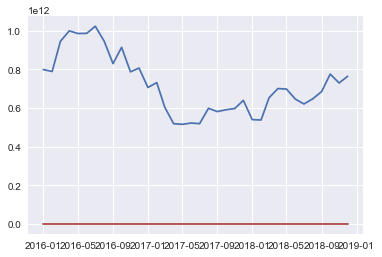

In [20]:
# 시간이 지남에 따른 외국인 카드 사용량 
# 17년에 뚝 떨어진 것을 확인
# 실제로 관련 데이터를 보면 외국인 입국이 현저히 줄어듦을 확인
# 이는 17년에 북핵문제와 더불어 사드문제가 큰 영향을 미친것으로 추정

tt = df.groupby('TA_YM')[['VLM','USEC']].sum()
tt['VLM/USEC'] = round(tt['VLM']/tt['USEC'])
# print(tt)
plt.plot(tt)

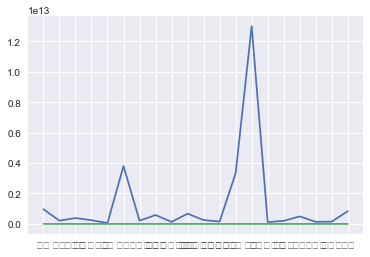

국가별 카드 총 사용 금액
nation
중국    12996618572900
미국     3804477646020
일본     3333678550787
대만      965707891495
홍콩      838687821614
Name: VLM, dtype: int64


nation
필리핀        150747533291
프랑스        135698645290
아랍에미레이트    132476683962
카자흐스탄      122804624951
몽고          56911201375
Name: VLM, dtype: int64



국가별 카드 총 사용 횟수
nation
중국    73441633
미국    52384056
일본    25829067
대만     7087337
홍콩     5178496
Name: USEC, dtype: int64


nation
필리핀        1364739
인도네시아      1098917
카자흐스탄       870538
아랍에미레이트     867837
몽고          374513
Name: USEC, dtype: int64


In [21]:
# 국가별 외국인 카드 사용 
## 상위 탑 5개국 중,미,일,대만,홍콩
## 카드 사용 횟수도 동일


nation = df.groupby('nation')[['VLM','USEC']].sum()
plt.plot(nation)
plt.show()

print("국가별 카드 총 사용 금액")
print(nation['VLM'].sort_values(ascending = False).astype('int64').head())
print('\n')
print(nation['VLM'].sort_values(ascending = False).astype('int64').tail())
print('\n\n')
print("국가별 카드 총 사용 횟수")
print(nation['USEC'].sort_values(ascending = False).astype('int64').head())
print('\n')
print(nation['USEC'].sort_values(ascending = False).astype('int64').tail())

## 프랑스는 총 사용금액에 비해 사용 횟수는 훨씬 더 많음을 확인 할 수 있다.
## 사용금액은 적은데 사용 횟수는 많다. 회당 round(135698645290/2397154) -> 56,608원

## 아이디어 회의

In [81]:
df.head()

,nation,sido,gu,GB3,GB2,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC
0,미국,세종,세종,의료,개인병원,2018-01-01,0,0,2071580,20
1,홍콩,세종,세종,교통,교통,2018-04-01,1,0,8100,1
2,미국,세종,세종,의료,개인병원,2018-06-01,1,0,60400,2
3,일본,세종,세종,교통,교통,2018-06-01,0,0,235000,4
4,미국,세종,세종,교통,교통,2018-10-01,0,0,853740,14


In [88]:
## 월별 카드 각 구별 카드 사용량ㅁ

card_month = df.groupby(['TA_YM','gu','GB2'])[['VLM','USEC']].sum()
card_month.head()
# card_month.to_csv('card_month.csv')

VLM  USEC
TA_YM      gu  GB2                  
2016-01-01 가평군 1급2급호텔    60000     1
               가전전자제품    46000     2
               개인병원     116150     4
               관광상품    3948398   145
               관광여행사   3135936    44

## 재방문의사가 부정적인 외국인의 요인을 파악 및  타켓 마케팅

한국을 처음 방문한 관광객들과 재방문한 관광객들의 특성을 파악

재방문에 있어서 부정적인 요인은 무엇인지???

target_변수 = 매우불편, 불편

## ㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁㅁ

In [28]:
df1 = pd.read_csv('df_16_csv.csv')
print(df1.shape)

(12003, 212)


In [29]:
df1.head()

,q1,q1a,wq1a,q2a,q2b1,q2c1,q3,mq3,q4,q4a1,...,mday_av3,ID,chasu,nat,city,sex,edu,job,age,wt
0,2,3,3.0,1.0,NaN,NaN,1,1.0,1,NaN,...,NaN,1060839,12,12,1328,1,3.0,3,4,0.15
1,2,3,3.0,1.0,NaN,NaN,4,9.0,1,NaN,...,NaN,1060840,12,3,401,1,1.0,3,3,0.69
2,1,1,NaN,1.0,NaN,NaN,1,1.0,1,NaN,...,NaN,1060841,12,12,1304,1,1.0,99,2,0.15
3,1,1,NaN,1.0,NaN,NaN,1,1.0,2,1.0,...,NaN,1060842,12,3,401,1,2.0,8,1,0.69
4,2,3,3.0,NaN,1.0,NaN,4,6.0,1,NaN,...,NaN,1060843,12,3,401,2,2.0,3,1,0.69


In [30]:
df1['wq1a'].describe()

count    4971.000000
mean        8.417019
std        19.765866
min         2.000000
25%         2.000000
50%         4.000000
75%         8.000000
max       500.000000
Name: wq1a, dtype: float64

q3 한국여행 결정 시점_category 
mq3 한국여행 결정 시점_원자료

wq1a 한국방문 횟수 원자료 

In [31]:
## 필요 변수 
## tagget 변수 - q1(재방문 여부 ) / q1a(재방문 횟수_category)/ wq1a(재방문횟수 원자료)

## 한국 여행에 대한 전반적인 만족도
# 출입국 절차, 대증교통, 숙박, 음식, 쇼핑, 관광지매력도, 관광안내서비스, 언어소통
# 여행경비, 치안, 성별, 직업, 나이,국가

# 이는 다시 df3에서 작업 예정


In [32]:
df2 = df1.copy()

df2 = df2[['q1','q1a','wq1a','q13','q13a01','q13a02','q13a03','q13a04','q13a05','q13a06','q13a07','q13a08','q13a09','q13a10','q14','q15','sex','job','age','nat']]
print(df2.columns)
print('\n')
print(df2.shape)
df2.head()

Index(['q1', 'q1a', 'wq1a', 'q13', 'q13a01', 'q13a02', 'q13a03', 'q13a04',
       'q13a05', 'q13a06', 'q13a07', 'q13a08', 'q13a09', 'q13a10', 'q14',
       'q15', 'sex', 'job', 'age', 'nat'],
      dtype='object')


(12003, 20)


,q1,q1a,wq1a,q13,q13a01,q13a02,q13a03,q13a04,q13a05,q13a06,q13a07,q13a08,q13a09,q13a10,q14,q15,sex,job,age,nat
0,2,3,3.0,4,3,5,4,5.0,3,3,4,3,3,5,3,3,1,3,4,12
1,2,3,3.0,4,4,4,3,4.0,4,5,5,3,3,5,4,4,1,3,3,3
2,1,1,NaN,5,5,5,5,5.0,5,5,5,5,5,5,5,5,1,99,2,12
3,1,1,NaN,4,4,4,4,5.0,4,3,4,3,4,3,4,4,1,8,1,3
4,2,3,3.0,4,3,4,5,5.0,5,4,4,4,4,4,5,5,2,3,1,3


#### 첫 방문과 재방문객의 차이 확인하기

추후에 2회 이하 방문과 3회 이상방문객으로 확장 가능 

_____> nat, sex, job, day

In [33]:
df3 = df2.copy()
df3.drop(['q1a','wq1a','q13'],axis = 1 ,inplace = True)
print(df3.shape)
df3.tail()

(12003, 17)


,q1,q13a01,q13a02,q13a03,q13a04,q13a05,q13a06,q13a07,q13a08,q13a09,q13a10,q14,q15,sex,job,age,nat
11998,2,5,4,4,5.0,4,4,2,2,3,5,4,4,1,12,2,10
11999,2,5,5,5,3.0,4,4,5,3,5,5,4,4,2,8,1,15
12000,2,5,5,5,5.0,5,5,5,5,5,5,5,5,2,12,1,9
12001,2,5,5,5,3.0,5,5,5,2,3,5,5,5,1,2,2,97
12002,2,4,4,4,4.0,4,4,4,4,4,4,4,4,1,2,5,1


In [34]:
df3.rename(columns = {'q1':'Y', 'q13a01':'immigration','q13a02':'p_trans','q13a03':'accomodation','q13a04':'food'
                      ,'q13a05':'shopping','q13a06':'t_attaraction','q13a07':'g_service'
                      ,'q13a08':'communication','q13a09':'t_money','q13a10':'security'} ,inplace=True)

df3.head(2)

,Y,immigration,p_trans,accomodation,food,shopping,t_attaraction,g_service,communication,t_money,security,q14,q15,sex,job,age,nat
0,2,3,5,4,5.0,3,3,4,3,3,5,3,3,1,3,4,12
1,2,4,4,3,4.0,4,5,5,3,3,5,4,4,1,3,3,3


In [87]:
print(df3.shape)
df3.info()



(12003, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12003 entries, 0 to 12002
Data columns (total 17 columns):
Y                12003 non-null int64
immigration      12003 non-null int64
p_trans          12003 non-null int64
accomodation     12003 non-null int64
food             12002 non-null float64
shopping         12003 non-null int64
t_attaraction    12003 non-null int64
g_service        12003 non-null int64
communication    12003 non-null int64
t_money          12003 non-null int64
security         12003 non-null int64
q14              12003 non-null int64
q15              12003 non-null int64
sex              12003 non-null int64
job              12003 non-null int64
age              12003 non-null int64
nat              12003 non-null int64
dtypes: float64(1), int64(16)
memory usage: 1.6 MB


In [36]:
## food 컬럼에서의 결측값 1건 확인
## null값지 많지 않으므로 해당 데이터 제거하고 진행 
df3.dropna()
# df3.fillna(3, inplace = True)

df3.isnull().sum()
df3['food'] = df3['food'].astype('int64')

In [37]:
## 데이터가 5점 척도로 되어 있다. 
## 이를 어떻게 사용할 것인가? 
## 전부다 카테고리컬 데이터이다. ml보다는 계량통계를 통해서 사람들의 경향성을
## 파악하는 분석이 더 좋을 듯 싶다. 
## 랜포를 확인하여 확인해보자꾸나 


df3.tail()

,Y,immigration,p_trans,accomodation,food,shopping,t_attaraction,g_service,communication,t_money,security,q14,q15,sex,job,age,nat
11998,2,5,4,4,5,4,4,2,2,3,5,4,4,1,12,2,10
11999,2,5,5,5,3,4,4,5,3,5,5,4,4,2,8,1,15
12000,2,5,5,5,5,5,5,5,5,5,5,5,5,2,12,1,9
12001,2,5,5,5,3,5,5,5,2,3,5,5,5,1,2,2,97
12002,2,4,4,4,4,4,4,4,4,4,4,4,4,1,2,5,1


In [91]:
df4 = pd.get_dummies(df3, columns=['sex'])

In [92]:
## 성별데이터 onehotencoding 완료 
## 1,0 남자 / 0,1 여자

df4.head()

,Y,immigration,p_trans,accomodation,food,shopping,t_attaraction,g_service,communication,t_money,security,q14,q15,job,age,nat,sex_1,sex_2
0,2,3,5,4,5,3,3,4,3,3,5,3,3,3,4,12,1,0
1,2,4,4,3,4,4,5,5,3,3,5,4,4,3,3,3,1,0
2,1,5,5,5,5,5,5,5,5,5,5,5,5,99,2,12,1,0
3,1,4,4,4,5,4,3,4,3,4,3,4,4,8,1,3,1,0
4,2,3,4,5,5,5,4,4,4,4,4,5,5,3,1,3,0,1


In [93]:
## 각 10개의 질문에 대한 만족도 및 성별만 남았다. 

df4.drop(['job','nat','age','q14','q15'], axis = 1, inplace = True)
df4.head(2)

,Y,immigration,p_trans,accomodation,food,shopping,t_attaraction,g_service,communication,t_money,security,q14,q15,sex_1,sex_2
0,2,3,5,4,5,3,3,4,3,3,5,3,3,1,0
1,2,4,4,3,4,4,5,5,3,3,5,4,4,1,0


In [96]:
df4.size

156039

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [117]:
dataset = df4.values
dataset

array([[2, 3, 5, ..., 5, 1, 0],
       [2, 4, 4, ..., 5, 1, 0],
       [1, 5, 5, ..., 5, 1, 0],
       ...,
       [2, 5, 5, ..., 5, 0, 1],
       [2, 5, 5, ..., 5, 1, 0],
       [2, 4, 4, ..., 4, 1, 0]], dtype=int64)

In [126]:
# 데이터 분할 

y = dataset[:,:1]
x = dataset[:,1:]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [127]:
# 모델 fit

rf = RandomForestClassifier(max_depth =3, n_estimators=100, random_state=0)
rf.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [129]:
# 정확도 판단

y_pred  = rf.predict(x_test)
print('Random forest Accuracy =', accuracy_score(y_test, y_pred))

Random forest Accuracy = 0.6231602332685365


In [133]:
## xgboost로 target data를 얼마나 설명하는지 확인하기

import xgboost as xgb

In [136]:
# 모델 생성
xg_reg = xgb.XGBRegressor(learning_rate = 0.1,max_depth = 2, n_estimators = 10)

# 모델 fit
xg_reg.fit(x_train,y_train)
y_pred = xg_reg.predict(x_test)



In [138]:
# 모델 확인
from sklearn import metrics

mse= metrics.mean_squared_error(y_test, y_pred)
print("RMSE:",np.sqrt(mse))

RMSE: 0.5782746601755057


In [167]:
# feat_imp를 그리기 위해서 해당 컬럼명을 np.array로 작성

df4_col = df4.copy()
df4_col.drop('Y', axis = 1, inplace = True)
df4_col = np.array(df4_col.columns)
type(df4_col)

numpy.ndarray

In [168]:
print(len(xg_reg.feature_importances_))
print(len(df4_col))

12
12


In [149]:
xg_reg.feature_importances_

array([0.16133799, 0.089683  , 0.03217658, 0.        , 0.13037163,
       0.1499039 , 0.3290199 , 0.        , 0.        , 0.10750706,
       0.        , 0.        ], dtype=float32)

Text(0, 0.5, 'Feature Importance Score')

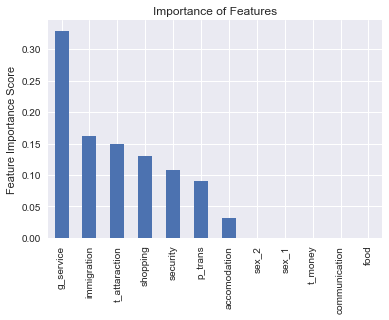

In [169]:
# 특정 변수가 target data를 얼마나 설명하는가를 보여주는 시각화 

feat_imp = pd.Series(xg_reg.feature_importances_, df4_col).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

In [170]:
xg_reg.feature_importances_

array([0.16133799, 0.089683  , 0.03217658, 0.        , 0.13037163,
       0.1499039 , 0.3290199 , 0.        , 0.        , 0.10750706,
       0.        , 0.        ], dtype=float32)

In [172]:
df4_col

array(['immigration', 'p_trans', 'accomodation', 'food', 'shopping',
       't_attaraction', 'g_service', 'communication', 't_money',
       'security', 'sex_1', 'sex_2'], dtype=object)

## ㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂㅂ

In [22]:
df1 = pd.read_csv('df_16_csv.csv')
print(df1.shape)

(12003, 212)


In [23]:
## df1 은 16년 외국인실태조사 원본 파일

df1.head()

,q1,q1a,wq1a,q2a,q2b1,q2c1,q3,mq3,q4,q4a1,...,mday_av3,ID,chasu,nat,city,sex,edu,job,age,wt
0,2,3,3.0,1.0,NaN,NaN,1,1.0,1,NaN,...,NaN,1060839,12,12,1328,1,3.0,3,4,0.15
1,2,3,3.0,1.0,NaN,NaN,4,9.0,1,NaN,...,NaN,1060840,12,3,401,1,1.0,3,3,0.69
2,1,1,NaN,1.0,NaN,NaN,1,1.0,1,NaN,...,NaN,1060841,12,12,1304,1,1.0,99,2,0.15
3,1,1,NaN,1.0,NaN,NaN,1,1.0,2,1.0,...,NaN,1060842,12,3,401,1,2.0,8,1,0.69
4,2,3,3.0,NaN,1.0,NaN,4,6.0,1,NaN,...,NaN,1060843,12,3,401,2,2.0,3,1,0.69


In [24]:
# 죠져버리기
# 외국인이 한국에 문에 영향을 줄 것 으로 예상되는 columns들만 남긴다.
 
df2 = df1.drop(['wq1a','q2a','q2b1','q2c1','mq3','q4a1','q4a2',"q4a3","q4a4",'q4a5','q5a1','q5a2','q5a3',
               'q6a2','q6a3','xq7a2','xq7a3','xq7a4','xq7a5','mq7','q8a1','q8a2','q8a3',
               'q9a1','q9a2','q9a3','q9a4','q9a5','q9a6','q9a7','q9a8','q9a9','q9a10','q9a11','q9a12',
                'q9a13','q9a14','q9a15','q9a16','q9a17','q9a18','q9a19','q9a20','q9a21','q9a22','q9a23','q9a24',
                'q9a25','q9a26','q9a27','q9a28','q9a29','q9a30','q9a31','q9a32','q9a33','q9a34','q9a35','q9a36',
                'q9a37','q9a38','q9a39','q9a40','yq9a01','yq9a02','yq9a03','yq9a04','yq9a05','yq9a06',
                'yq9a07','yq9a08','yq9a09','yq9a10','yq9a11','yq9a12','yq9a13','yq9a14','yq9a15','yq9a16','yq9a17',
                'yq9a97','yq9a99','grp1','grp2','grp3','grp4','grp5','grp6','grp7','grp8','grp9','grp99',
                'mq10','mmq10','q11a1','q11a2','q11a3','q12a2','q12a3','q12b1','q12b2','q12b3',
                'q18a1','q18a2','q18a3','q18a4','q18a5','q18a6','q18a7','q18a8','mtzq19',
                'mtzq19a1','mtzq19a2','mtzq19a3','mtzq19a4','mtzq19a5','mtzq19a6','mtzq19a7','mtzq19a8','mtzq19a9','mtzq19a10',
                'wtzq19','wtzq19a1','wtzq19a2','wtzq19a3','wtzq19a4','wtzq19a5','wtzq19a6','wtzq19a7','wtzq19a8', 
                'wtzq19a9','wtzq19a10','mzq19a0','mzq19a1','mzq19a3','mzq19a4','mzq19a5',
                'mzq19a6','mzq19a7','mzq19a8','mzq19a9','mzq19a10','mzq19b0','mzq19b2','mzq19b3','mzq19b4',
                'mzq19b5','mzq19b6','mzq19b7','mzq19b8','mzq19b9','mzq19b10','wzq19a0','wzq19a1',
                'wzq19a3','wzq19a4','wzq19a5','wzq19a6','wzq19a7','wzq19a8','wzq19a9','wzq19a10',
                'wzq19b0','wzq19b2','wzq19b3','wzq19b4','wzq19b5','wzq19b6','wzq19b7','wzq19b8','wzq19b9','wzq19b10',
                'mday_av0','mday_av1','mday_av2','mday_av3','ID','chasu','city','wt'],axis = 1)
df2.head()

,q1,q1a,q3,q4,q5,q6a1,xq7a1,q7,q8b,q10,...,q14,q15,q16a,q16b,q17,nat,sex,edu,job,age
0,2,3,1,1,6,3,NaN,3,13,7,...,3,3,4,4,1,12,1,3.0,3,4
1,2,3,4,1,1,3,NaN,3,2,5,...,4,4,4,4,1,3,1,1.0,3,3
2,1,1,1,1,6,3,NaN,2,16,8,...,5,5,3,5,1,12,1,1.0,99,2
3,1,1,1,2,1,3,NaN,3,10,7,...,4,4,4,5,1,3,1,2.0,8,1
4,2,3,4,1,1,3,NaN,3,2,6,...,5,5,4,4,1,3,2,2.0,3,1


In [25]:
# 혼자 왔는지 누구랑 왔는지에 대한 결측치가 8344건으로 총 12003건에 비해 너무 많은 결측치..
# 이 데이터는 일단 버리고 진행
# xq7a1

df2.isnull().sum()
df2.drop('xq7a1', axis = 1, inplace = True)

In [26]:
df2.shape

(12003, 31)

In [27]:
df2.isnull().sum()

q1        0
q1a       0
q3        0
q4        0
q5        0
q6a1      0
q7        0
q8b       0
q10       0
q12a1     0
q13       0
q13a01    0
q13a02    0
q13a03    0
q13a04    1
q13a05    0
q13a06    0
q13a07    0
q13a08    0
q13a09    0
q13a10    0
q14       0
q15       0
q16a      0
q16b      0
q17       0
nat       0
sex       0
edu       1
job       0
age       0
dtype: int64

In [28]:
## 해당 결측치들이 큰 영향을 미치지 않을거라 판단하고 제거하기로 한다.

df2[df2['q13a04'].isnull()]
df2[df2['edu'].isnull()]
df2.drop([2126,11823], inplace = True)

In [29]:
# 예측하려는 q1에 직접적인 영향을 주고 있는 q1a를 삭제하고 진행한다.
df3 = df2.copy()

df3.drop('q1a', axis =1 ,inplace =True)

In [30]:
print(df3.columns)
print(len(df.columns))

Index(['q1', 'q3', 'q4', 'q5', 'q6a1', 'q7', 'q8b', 'q10', 'q12a1', 'q13',
       'q13a01', 'q13a02', 'q13a03', 'q13a04', 'q13a05', 'q13a06', 'q13a07',
       'q13a08', 'q13a09', 'q13a10', 'q14', 'q15', 'q16a', 'q16b', 'q17',
       'nat', 'sex', 'edu', 'job', 'age'],
      dtype='object')
10


In [31]:
## 전부다 펼치자
## categorycal 변수들을 전부다 더미변수로 변경하기


df4 = pd.get_dummies(df3, columns=['q3','q4','q5','q6a1','q7','q8b','q10','q12a1','q13',
                                    'q14','q15','q16a','q16a','q17','nat','edu','job','age'                                 
                                   ])
print(len(df4.columns))

169


In [32]:
## 변경 완료

df4.tail()

,q1,q13a01,q13a02,q13a03,q13a04,q13a05,q13a06,q13a07,q13a08,q13a09,...,job_11,job_12,job_99,age_0,age_1,age_2,age_3,age_4,age_5,age_9
11998,2,5,4,4,5.0,4,4,2,2,3,...,0,1,0,0,0,1,0,0,0,0
11999,2,5,5,5,3.0,4,4,5,3,5,...,0,0,0,0,1,0,0,0,0,0
12000,2,5,5,5,5.0,5,5,5,5,5,...,0,1,0,0,1,0,0,0,0,0
12001,2,5,5,5,3.0,5,5,5,2,3,...,0,0,0,0,0,1,0,0,0,0
12002,2,4,4,4,4.0,4,4,4,4,4,...,0,0,0,0,0,0,0,0,1,0


In [33]:
df4.size

2028169

In [108]:
# 각 컬럼 갯수 y 1개, x 166개 

y = df4['q1'].values
x = df4.values[:,1:]

print(y.shape)
print(x.shape)

(12001,)
(12001, 168)


In [146]:
## 1. 랜덤포레스트를 통해서 중요변수 찾아내기 

## 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state =0)

## 모델 생성
rfc = RandomForestClassifier(max_depth =3, n_estimators=400, random_state=0, oob_score =True)

# 모델 fit
rfc.fit(x_train, y_train)

# 정확성 판단 
from sklearn.metrics import accuracy_score
y_pred = rfc.predict(x_test)

print('Random forest Accuracy =', accuracy_score(y_test, y_pred))
print('Random forest oob =', rfc.oob_score_)


# print("훈련 세트 정확도 : {:.3f}".format(forest.score(x_train,y_train)))
# print("테스트 세트 정확도 : {:.3f}".format(forest.score(x_test,y_test)))

Random forest Accuracy = 0.6831435712302139
Random forest oob = 0.6714285714285714


In [141]:
# 각 모델마다의 중요 변수 확인을 위한 시각화 함수 정의

def visualization_(model):
    
    n_features = x_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features), df4.columns[1:])
    plt.xlabel("feature importance")
    plt.ylabel("feature name")
    plt.ylim(-1, n_features)
    plt.show()
    
    print(model.feature_importances_[model.feature_importances_ != 0])



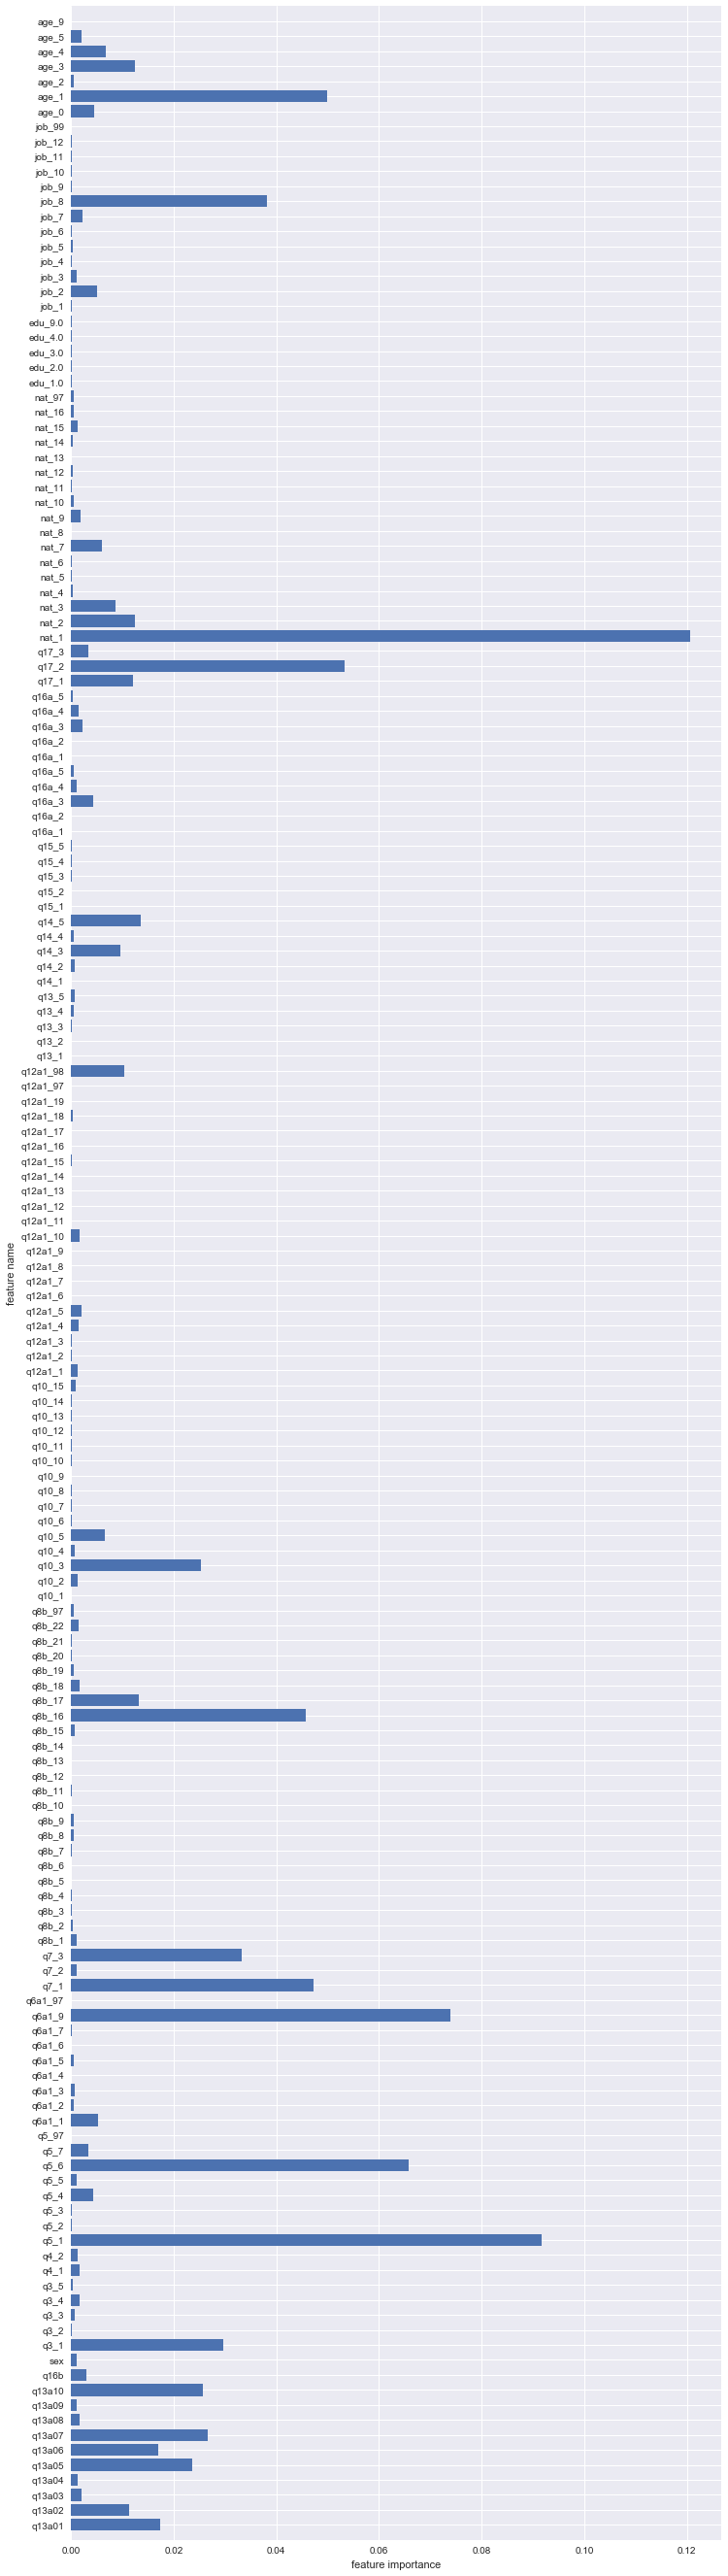

[1.72913596e-02 1.12884130e-02 2.00764059e-03 1.35456792e-03
 2.36608649e-02 1.69581690e-02 2.65480672e-02 1.62803083e-03
 1.01271513e-03 2.57275043e-02 2.94467546e-03 1.18569496e-03
 2.96184176e-02 1.40272624e-04 6.29359225e-04 1.68820450e-03
 3.01241654e-04 1.65987046e-03 1.27946162e-03 9.17523203e-02
 9.91309431e-05 2.30213568e-04 4.31664267e-03 1.03761653e-03
 6.57229942e-02 3.42802512e-03 5.34153169e-03 6.11981180e-04
 7.56290205e-04 2.32145952e-05 4.83338875e-04 3.69506958e-05
 2.19564968e-04 7.39655960e-02 2.51089112e-05 4.72163814e-02
 1.00750980e-03 3.31828292e-02 1.17973663e-03 2.98728539e-04
 7.11143905e-05 9.26481647e-05 3.97082873e-05 2.68692053e-05
 1.70219110e-04 4.64345396e-04 5.70556300e-04 3.90284758e-05
 1.14853327e-04 1.82318892e-05 4.01170282e-05 7.66334705e-04
 4.56686644e-02 1.31327742e-02 1.64625225e-03 5.75449014e-04
 1.92768384e-04 9.85033756e-05 1.45660033e-03 4.97940888e-04
 1.26352311e-03 2.53523620e-02 6.24396820e-04 6.52534120e-03
 1.71816355e-04 8.277841

In [143]:
## 1. 랜덤포레스트를 통해서 중요변수 시각화

plt.figure(figsize=(12,48))
visualization_(rfc)

confusion_matrix : 
 [[2038  125]
 [1016  422]]


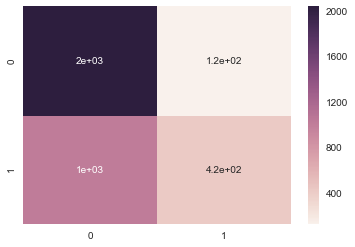

In [54]:
# 랜덤포레스트모델을 활용한 시각화 (잘 분류하는지) 

import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
print("confusion_matrix :",'\n',
      confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot = True)

In [184]:
## 2. dt로 확인하기 

dtc = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 4)
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)
print('dtc Accuracy =', accuracy_score(y_test, y_pred))


print('\n')
print(confusion_matrix(y_test, dtc.predict(x_test)))

dtc Accuracy = 0.6859205776173285


[[1960  203]
 [ 928  510]]


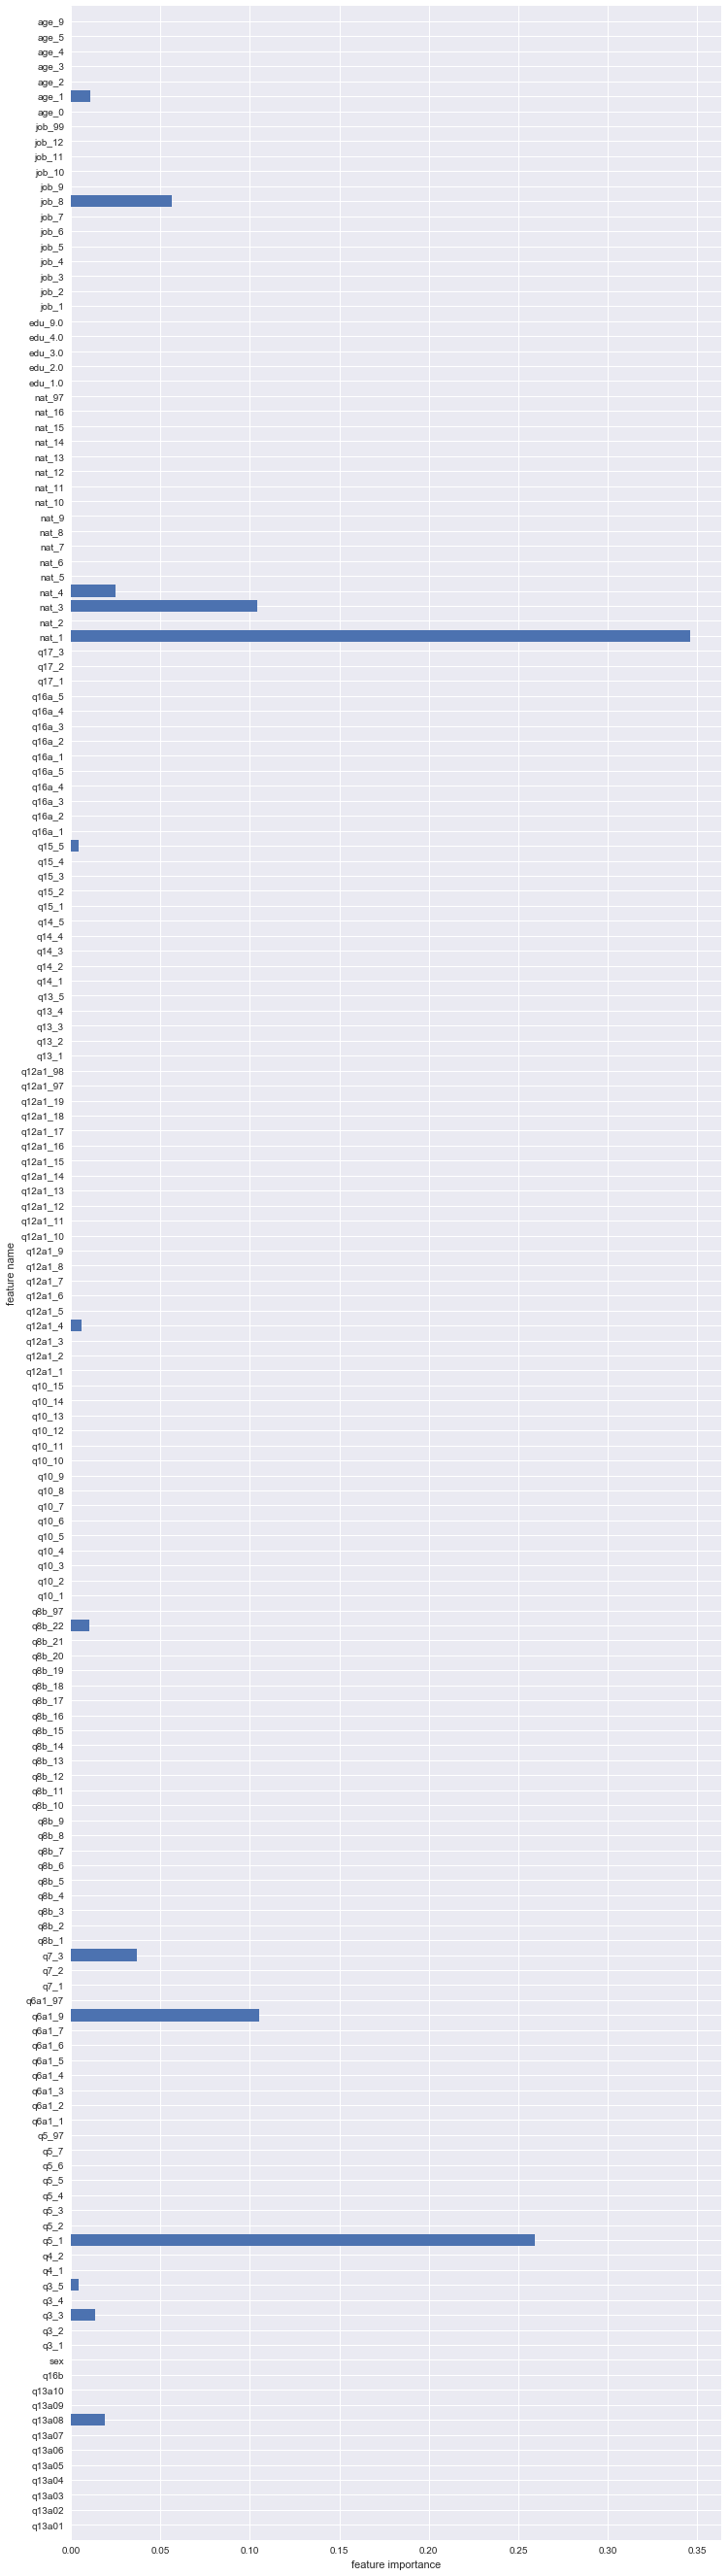

[0.01909236 0.01350283 0.00399018 0.25924265 0.10506546 0.03652967
 0.01037261 0.00569081 0.0044758  0.34605411 0.10432896 0.02459381
 0.05648328 0.01057747]


In [151]:
# 2. dt로 확인한 변수 중요도 시각화

# 0.3이상 일본
# 0.25이상 여가,위락,개별휴가
# 사전에 정보를 얻지않은 사람  
# 나라는 홍콩, 싱가폴, 일본에 영향 
# 0.05이상 직업은 학생 나이는 21~30세에 중요도 확인
# 쇼핑에서도 의류?
# 전통문화체험?z


plt.figure(figsize=(12,48))
visualization_(dtc)

### =================================================나무 가지 시각화 미완성

In [194]:
# 나무 가지 시각화하기 
# 파일의 경로를 찾을 수 없다는 에러발생
# 추후 에러해결하여 완성하기
# https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn

rfc.estimators_[5]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1537364731, splitter='best')

In [195]:
estimator = rfc.estimators_[5]

In [210]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                
                feature_names = df4.columns[1:],
                class_names = df4.columns[0],
                
                rounded = True, proportion = False, 
                precision = 2, filled = True)


In [229]:
# Convert to png
from subprocess import call
from subprocess import check_call

# check_call(['dot','-Tpng','InputFile.dot','-o','OutputFile.png'])
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])


# !dot -Tpng tree_limited.dot -o tree_limited.png -Gdpi=600

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다

In [ ]:
Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off')
plt.show()

### ===========================================================

RMSE: 0.42299237994362526


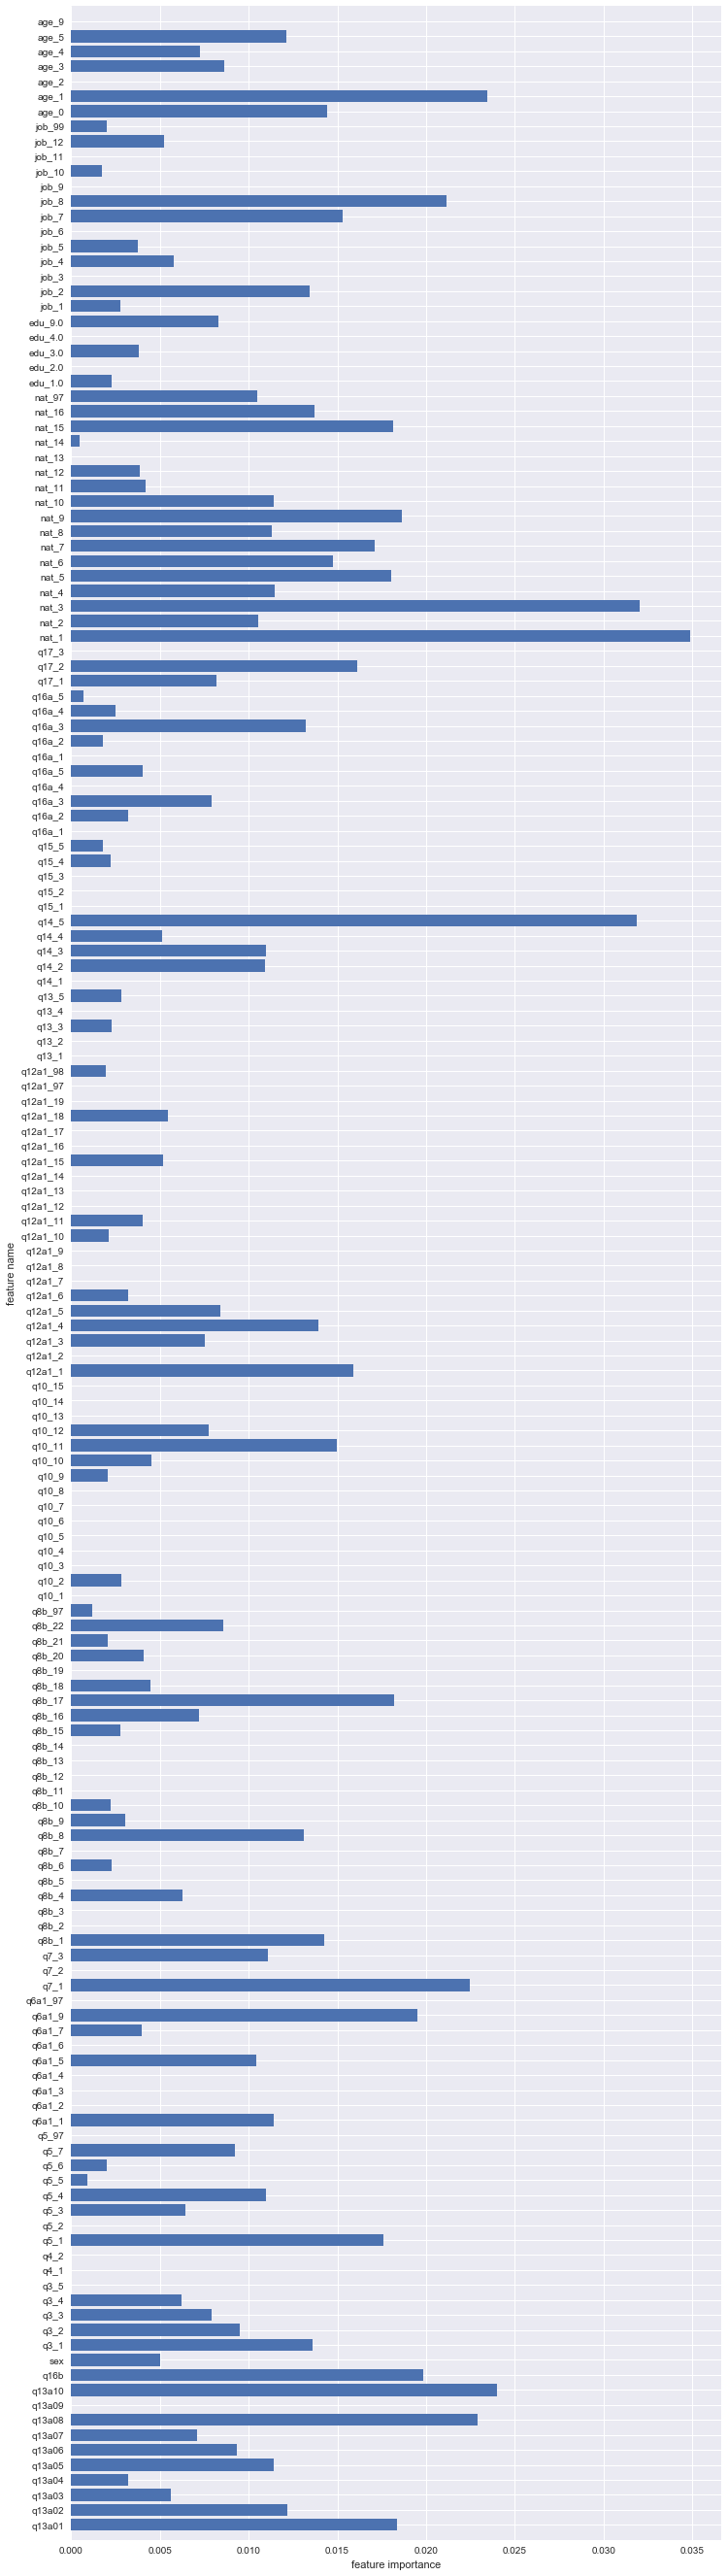

[0.01835353 0.01216033 0.00560606 0.00322742 0.0113913  0.00935554
 0.00709808 0.02289437 0.02400833 0.01981343 0.00502796 0.01362371
 0.00952319 0.00794277 0.00619931 0.01758733 0.00643866 0.0109562
 0.00092379 0.00200775 0.00923199 0.01144165 0.0104049  0.00397905
 0.01949965 0.0224584  0.01106154 0.01427219 0.00629552 0.00226794
 0.01311361 0.00306571 0.00222008 0.00280218 0.00720586 0.01820568
 0.00445888 0.00410377 0.00207981 0.00859625 0.0012149  0.00280653
 0.00204467 0.00454891 0.01495351 0.00772568 0.01589549 0.00750888
 0.01391201 0.00839775 0.00319164 0.00210545 0.00400999 0.00516443
 0.00545203 0.00196948 0.00226912 0.00281557 0.01091969 0.01097391
 0.00514493 0.03183921 0.00220819 0.00180764 0.00321721 0.00789415
 0.00404326 0.00181691 0.01324113 0.00252222 0.00069479 0.00820567
 0.01614158 0.03486736 0.01056133 0.03201409 0.01149798 0.01803142
 0.0147513  0.017104   0.0113132  0.01864412 0.01143267 0.00417402
 0.00386925 0.00046635 0.01816067 0.01368967 0.01046145 0.00228

In [162]:
# 3. GBM을 활용한 변수 중요도 찾기 

from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics


# 모델 생성 
GBM_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=2)

# fitting
GBM_reg.fit(x_train, y_train)
y_pred = GBM_reg.predict(x_test)

# mse 구하기
mse= metrics.mean_squared_error(y_test, y_pred)
print("RMSE:",np.sqrt(mse))

# est_list = [100,200,300,400,500]
# for n_estimator in est_list:
#    GBM_reg = GradientBoostingRegressor(n_estimators=n_estimator, learning_rate=0.1, max_depth=2)
#    GBM_reg.fit(x_train, y_train)
#    y_pred = GBM_reg.predict(x_test)
#    mse= metrics.mean_squared_error(y_test, y_pred)
#    print("RMSE:",np.sqrt(mse))
#    print("========================")


# gbm 시각화 (중요변수 확인하기)
plt.figure(figsize=(12,48))
visualization_(GBM_reg)

# 흐음,,,,,, 파라미터 튜닝 결과 n_estimators = 200, 일때 rmse 값이 (100간격) 가장 좋아서
# 이거 기준으로 돌려보면 다음과 같은 결과가 나온다.

In [165]:
# 4. xgboost를 통해 변수 중요도 확인하기 
import xgboost as xgb

# 모델 생성
xg_reg = xgb.XGBRegressor(learning_rate = 0.1,max_depth = 2, n_estimators = 10)

# 모델 fitting
xg_reg.fit(x_train,y_train)
y_pred = xg_reg.predict(x_test)

mse= metrics.mean_squared_error(y_test, y_pred)
print("RMSE:",np.sqrt(mse))



RMSE: 0.5509036221643507


In [171]:
# xgboost parameter 튜닝하기
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline


# n_estimators = [50,100,150,200,250,300,350,400,450,500]
# max_featrues = [2,3,4]
# bootstrap = [True, False]

# param_grid = [{'n_estimators' : n_estimators, 
#                'max_features': max_featrues,
#               'bootstrap': bootstrap}]

# rf = RandomForestRegressor()
# grid_search = GridSearchCV(rf, param_grid=param_grid, cv = 4,
#                           scoring='neg_mean_squared_error')

# grid_search.fit(x_train, y_train)

# 튜닝 결과 {'bootstrap': False, 'max_features': 4, 'n_estimators': 500} 로 확인

print(grid_search.best_params_)

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_features': [2, 3, 4], 'bootstrap': [True, False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [173]:
# 파라미터 튜닝 결과 눈으로 확인하기 
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.43807397722737373 {'bootstrap': True, 'max_features': 2, 'n_estimators': 50}
0.4369099558533881 {'bootstrap': True, 'max_features': 2, 'n_estimators': 100}
0.43531781250437923 {'bootstrap': True, 'max_features': 2, 'n_estimators': 150}
0.43559358105594587 {'bootstrap': True, 'max_features': 2, 'n_estimators': 200}
0.43491780942194236 {'bootstrap': True, 'max_features': 2, 'n_estimators': 250}
0.43529110098024354 {'bootstrap': True, 'max_features': 2, 'n_estimators': 300}
0.4349248429874052 {'bootstrap': True, 'max_features': 2, 'n_estimators': 350}
0.4352753960275089 {'bootstrap': True, 'max_features': 2, 'n_estimators': 400}
0.43446192944421536 {'bootstrap': True, 'max_features': 2, 'n_estimators': 450}
0.435114839247449 {'bootstrap': True, 'max_features': 2, 'n_estimators': 500}
0.43696867055616134 {'bootstrap': True, 'max_features': 3, 'n_estimators': 50}
0.4341877885365798 {'bootstrap': True, 'max_features': 3, 'n_estimators': 100}
0.43324870357964046 {'bootstrap': True, 'max_fea

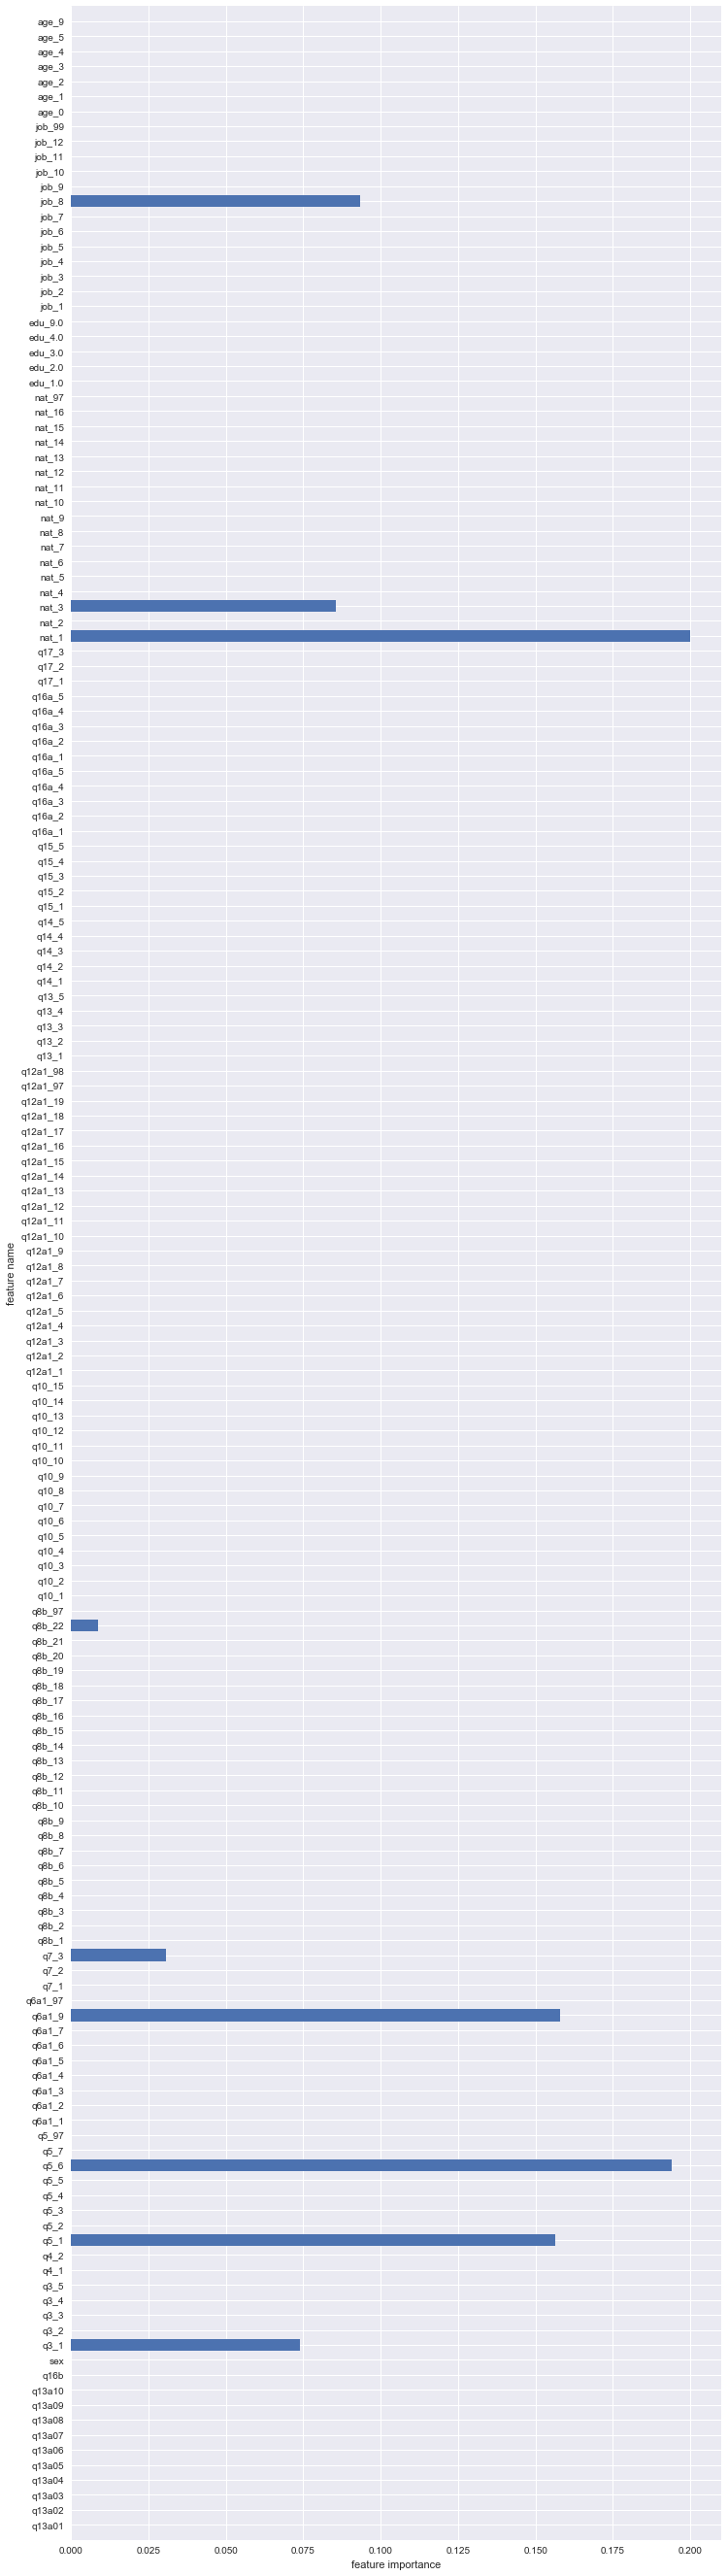

[0.07389594 0.15644684 0.19382432 0.15792133 0.03068588 0.00858289
 0.19990134 0.08544801 0.09329344]


In [176]:
# xgboost를 활용하여 중요변수 시각화하기 

plt.figure(figsize =(12,48))
visualization_(xg_reg)

# dtc의 결과와 매우 흡사하게 나온것을 확인 할 수 있다. 

# 하지만 이번에는 사업 또는 전문활동이 가장 높은 값을 가짐을 확인!! 
# 여행결정시점 1개월! 

#### 중간 평가
총 4가지의 머신러닝을 통해서 중요변수는 다음과 같이 추정 할 수 있다. 

이를 토대로 부정적인 영향에 미치는 변수를 확인하고 이를 어떻게 활용할지에 대해서 생각하도록 한다.


7.31 아이디어

4가지의 모델을 통해 16년 (17,18년도 해야한다.) 외국인실태조사 데이터에서 재방문에 영향을 미치는 중요변수를 확인한다.
신한카드 데이터를 통해 국내 카드사용을 토대도 외국인이 느끼는 한국 구별 특징을 파악한다
국내 지자체가 추구하는 목적과 일치하면 best!! 그렇지 않으면 새로운 방안 마련!! 

+
국내 여행관광객들의 관광 소비 지출에서의 패턴을 파악하고 외국인이 느끼는 문화와 같다면? 혹은 다르다면?


In [236]:
df.head()

,nation,sido,gu,GB3,GB2,TA_YM,DAW_CCD_R,APV_TS_DL_TM_R,VLM,USEC
0,미국,세종,세종,의료,개인병원,2018-01-01,0,0,2071580,20
1,홍콩,세종,세종,교통,교통,2018-04-01,1,0,8100,1
2,미국,세종,세종,의료,개인병원,2018-06-01,1,0,60400,2
3,일본,세종,세종,교통,교통,2018-06-01,0,0,235000,4
4,미국,세종,세종,교통,교통,2018-10-01,0,0,853740,14


In [235]:
df4.head()

,q1,q13a01,q13a02,q13a03,q13a04,q13a05,q13a06,q13a07,q13a08,q13a09,...,job_11,job_12,job_99,age_0,age_1,age_2,age_3,age_4,age_5,age_9
0,2,3,5,4,5.0,3,3,4,3,3,...,0,0,0,0,0,0,0,1,0,0
1,2,4,4,3,4.0,4,5,5,3,3,...,0,0,0,0,0,0,1,0,0,0
2,1,5,5,5,5.0,5,5,5,5,5,...,0,0,1,0,0,1,0,0,0,0
3,1,4,4,4,5.0,4,3,4,3,4,...,0,0,0,0,1,0,0,0,0,0
4,2,3,4,5,5.0,5,4,4,4,4,...,0,0,0,0,1,0,0,0,0,0
